In [1]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [4]:
import pandas as pd
import importlib
import utility as u

In [5]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [6]:
size = 7
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [7]:
"""
with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)
"""

'\nwith open(f"{size}_tasks.txt", "a") as f:\n    for t in tasks:\n        print(t.task_id, t.duration, t.deadline, t.profit, file=f)\n'

In [8]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [9]:
problem_ffp.length

7

In [10]:
problem_ffp.fitness

64.0

In [11]:
# GAJ runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [12]:
df_run_curves_ffp.shape

(3241, 7)

In [13]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.002849,80.0,0.0,40,0.07,2048
1,1,0.013380,105.0,2.0,40,0.07,2048
2,2,0.018685,114.0,4.0,40,0.07,2048
3,3,0.027115,117.0,6.0,40,0.07,2048
4,4,0.029764,137.0,8.0,40,0.07,2048


In [14]:
df_run_curves_ffp['Fitness'].max()

161.0

In [15]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
34,34,0.159750,161.0,43.0,40,0.07,2048
35,35,0.162319,161.0,44.0,40,0.07,2048
36,36,0.164680,161.0,45.0,40,0.07,2048
37,37,0.170371,161.0,46.0,40,0.07,2048
38,38,0.177154,161.0,47.0,40,0.07,2048
...,...,...,...,...,...,...,...
3236,516,2.479937,161.0,526.0,60,0.08,2048
3237,517,2.488478,161.0,527.0,60,0.08,2048
3238,518,2.495282,161.0,528.0,60,0.08,2048
3239,519,2.498121,161.0,529.0,60,0.08,2048


In [16]:
# need to check Time and FEvals

In [17]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [18]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
34,34,0.159750,161.0,43.0,40,0.07,2048
35,35,0.162319,161.0,44.0,40,0.07,2048
36,36,0.164680,161.0,45.0,40,0.07,2048
37,37,0.170371,161.0,46.0,40,0.07,2048
38,38,0.177154,161.0,47.0,40,0.07,2048
...,...,...,...,...,...,...,...
3236,516,2.479937,161.0,526.0,60,0.08,2048
3237,517,2.488478,161.0,527.0,60,0.08,2048
3238,518,2.495282,161.0,528.0,60,0.08,2048
3239,519,2.498121,161.0,529.0,60,0.08,2048


In [19]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,40,0.07,43.0,284.0,0.159750
1,40,0.08,82.0,322.0,0.000928
2,50,0.07,64.0,305.0,0.000928
3,50,0.08,35.0,276.0,0.120319
4,60,0.07,37.0,278.0,0.128315
5,60,0.08,30.0,270.0,0.095698


In [20]:
# tentatively, pick pop size = 60 and mutation_rate = 0.08

In [21]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.002849,80.0,0.0,40,0.07,2048
1,1,0.013380,105.0,2.0,40,0.07,2048
2,2,0.018685,114.0,4.0,40,0.07,2048
3,3,0.027115,117.0,6.0,40,0.07,2048
4,4,0.029764,137.0,8.0,40,0.07,2048


In [22]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [23]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[60], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [24]:
df_iter_curves_ffp.shape

(5308, 7)

In [25]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.003318,80.0,0.0,60,0.08,2048
1,1,0.025488,105.0,2.0,60,0.08,2048
2,2,0.035233,111.0,4.0,60,0.08,2048
3,3,0.043393,111.0,5.0,60,0.08,2048
4,4,0.047304,128.0,7.0,60,0.08,2048


In [26]:
df_iter_curves_ffp.Fitness.max()

161.0

In [27]:
df_iter_curves_ffp.to_csv(f'../../csv-files/ga_js_{size}.csv')
"""
import pandas as pd
import numpy as np
size = 7
df_iter_curves_ffp = pd.read_csv(f'../../csv-files/ga_js_{size}.csv')
"""

"\nimport pandas as pd\nimport numpy as np\nsize = 7\ndf_iter_curves_ffp = pd.read_csv(f'../../csv-files/ga_js_{size}.csv')\n"

In [28]:
df_iter_curves_ffp.Iteration.max()

572

In [29]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [30]:
df_fitness_iter_ffp.shape

(573, 3)

In [31]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,79.0,336.444444
1,1,113.0,64.000000
2,2,119.4,46.266667
3,3,122.8,43.066667
4,4,129.3,40.455556


In [32]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

20      20
21      21
22      22
23      23
24      24
      ... 
533    533
534    534
535    535
536    536
537    537
Name: Iteration, Length: 5010, dtype: int64

In [33]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

72

In [34]:
converge_iter = df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

In [35]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [36]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,79.0,336.444444,18.342422
1,1,113.0,64.000000,8.000000
2,2,119.4,46.266667,6.801961
3,3,122.8,43.066667,6.562520
4,4,129.3,40.455556,6.360468


Text(0, 0.5, 'Fitness')

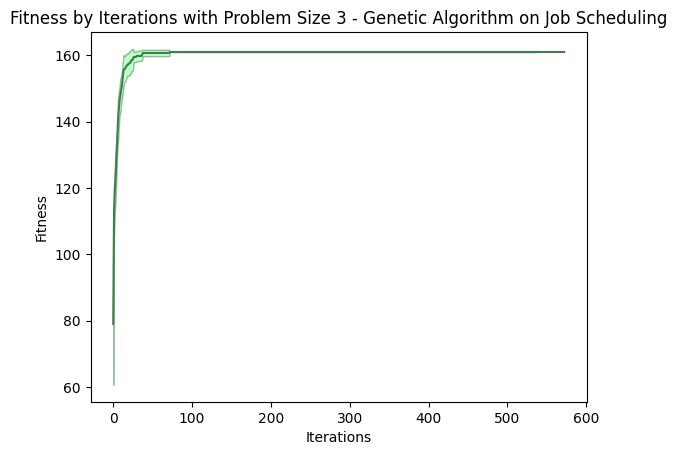

In [37]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Fitness by Iterations with Problem Size 3 - Genetic Algorithm on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [38]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration == 400].avg_fitness

400    161.0
Name: avg_fitness, dtype: float64

In [39]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.max()

(nan, nan)

In [40]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.max()

(nan, nan)

In [41]:
df_fitness_iter_ffp.stddev_fitness.max()

18.342421989596804

In [42]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

8.000000000000004

In [43]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [44]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()].Iteration

1    1
Name: Iteration, dtype: int64

In [45]:
# Fevals - iteration

In [46]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [47]:
df_FEvals_iter_ffp.shape

(573, 3)

In [48]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.6,0.488889
3,3,5.1,0.988889
4,4,7.0,0.888889


In [49]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [50]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
72,72,81.4,3.6,1.897367


In [51]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 2.057506581601462)

In [52]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.6,0.488889,0.699206
3,3,5.1,0.988889,0.994429
4,4,7.0,0.888889,0.942809


Text(0, 0.5, 'FEvals')

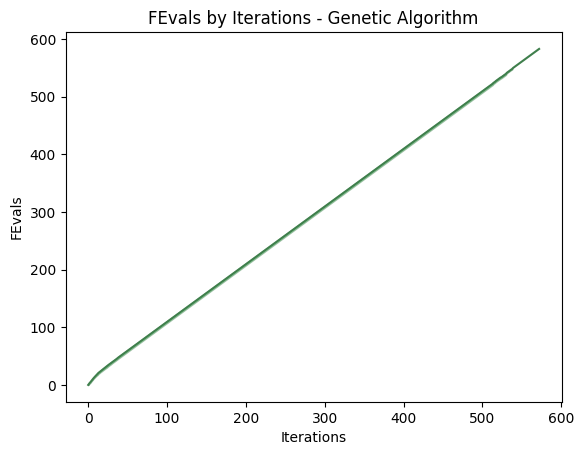

In [53]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [54]:
# fitness - wall clock time

In [55]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [56]:
df_time_iter_ffp.shape

(573, 3)

In [57]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.001024,6.905111e-07
1,1,0.009166,3.913568e-05
2,2,0.015717,6.663959e-05
3,3,0.024941,1.378101e-04
4,4,0.030576,2.127929e-04


In [58]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [59]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.001024,6.905111e-07,0.000831
1,1,0.009166,3.913568e-05,0.006256
2,2,0.015717,6.663959e-05,0.008163
3,3,0.024941,1.378101e-04,0.011739
4,4,0.030576,2.127929e-04,0.014587


Text(0, 0.5, 'Time')

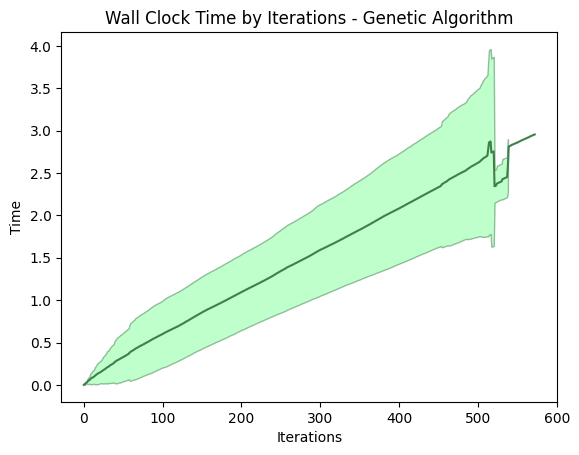

In [60]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [61]:
df_time_iter_ffp.stddev_time.max()

1.114918048244199

In [62]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 501]

,Iteration,avg_time,var_time,stddev_time
501,501,2.62529,0.762033,0.872945


In [63]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

520    520
Name: Iteration, dtype: int64

In [64]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_time,var_time,stddev_time
72,72,0.461909,0.136372,0.369286
